In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPool2D

Using TensorFlow backend.


In [2]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
y_train = X_train["label"]
X_train = X_train.drop(labels = ["label"],axis = 1) 


<BarContainer object of 10 artists>

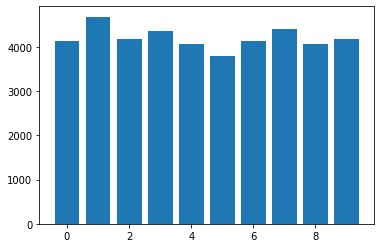

In [4]:
label = Counter(y_train)
plt.bar(label.keys(),label.values())

In [5]:
X_train = X_train.values.astype("float32")
X_test = X_test.values.astype("float32")
y_train = y_train.values.astype("int32")

In [6]:
X_train.shape , X_test.shape

((42000, 784), (28000, 784))

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
u,index = np.unique(y_train,return_index=True)

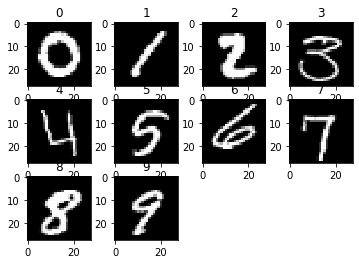

In [10]:
a = 0
for i in range(len(index)):
    a = a + 1
    plt.subplot(3, 4, a)
    plt.imshow(X_train[index[i]][:,:,0], cmap=plt.get_cmap('gray'))
    plt.title(y_train[index[i]])

    

In [11]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]

In [12]:
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [21]:
datagen = ImageDataGenerator(
        zca_whitening=False,  # apply ZCA whiteningTrue
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(X_train)
train_iterator = datagen.flow(X_train,y_train, batch_size=64)

In [22]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1000, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1000, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)       

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [26]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience = 25)
callback = [checkpoint, es]

In [27]:
history = model.fit_generator(generator=train_iterator, steps_per_epoch=len(train_iterator), epochs=100, 
                    validation_data = (X_val, y_val), callbacks = callback)

Epoch 1/100
591/591 [==============================] - 54s 91ms/step - loss: 0.6882 - accuracy: 0.7802 - val_loss: 0.1981 - val_accuracy: 0.9388

Epoch 00001: val_accuracy improved from -inf to 0.93881, saving model to weights.best.hdf5
Epoch 2/100
591/591 [==============================] - 52s 88ms/step - loss: 0.2443 - accuracy: 0.9276 - val_loss: 0.1169 - val_accuracy: 0.9636

Epoch 00002: val_accuracy improved from 0.93881 to 0.96357, saving model to weights.best.hdf5
Epoch 3/100
591/591 [==============================] - 52s 88ms/step - loss: 0.1873 - accuracy: 0.9454 - val_loss: 0.0800 - val_accuracy: 0.9750

Epoch 00003: val_accuracy improved from 0.96357 to 0.97500, saving model to weights.best.hdf5
Epoch 4/100
591/591 [==============================] - 52s 89ms/step - loss: 0.1723 - accuracy: 0.9501 - val_loss: 0.0550 - val_accuracy: 0.9814

Epoch 00004: val_accuracy improved from 0.97500 to 0.98143, saving model to weights.best.hdf5
Epoch 5/100
 48/591 [=>....................

KeyboardInterrupt: 

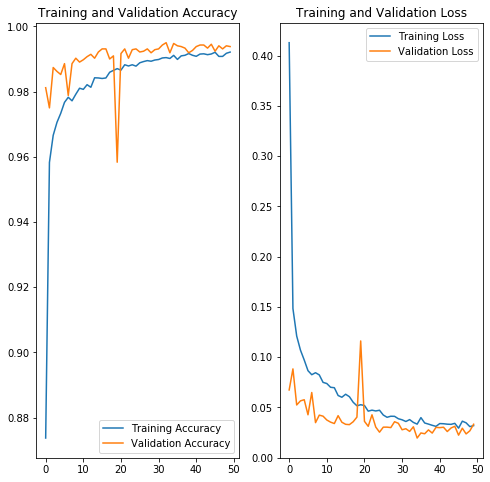

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
model.load_weights("weights.best.hdf5")

In [25]:
pred = model.predict_classes(X_test, verbose=1)

28000/28000 [==============================] - 13s 451us/step


In [26]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [28]:
sub = pd.read_csv('sample_submission.csv')
sub['Label'] = pred
sub.to_csv("output.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
